# Visulization of the first convolutional layer
First load the weights.

In [1]:
import torch
from torch.utils.serialization import load_lua
import numpy as np
weights = np.array(load_lua('../data/lua/c1_W.t7'))
print('the initial shape of weights is:\t', weights.shape)
weights = weights.transpose(0, 2, 3, 1)
print('now the shape of weights is:\t\t', weights.shape)

the initial shape of weights is:	 (24, 3, 7, 7)
now the shape of weights is:		 (24, 7, 7, 3)


Now visualize the weights.

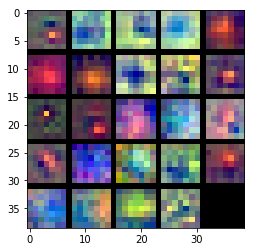

In [3]:
import math
(N, H, W, C) = weights.shape
padding = 1
ubound = 255.0
grid_size = int(math.ceil(math.sqrt(N)))
grid_height = H * grid_size + padding * (grid_size - 1)
grid_width = W * grid_size + padding * (grid_size - 1)
grid = np.zeros((grid_height, grid_width, C))
next_idx = 0
y0, y1 = 0, H
for y in range(grid_size):
    x0, x1 = 0, W
    for x in range(grid_size):
        if next_idx < N:
            img = weights[next_idx]
            low, high = np.min(img), np.max(img)
            grid[y0:y1, x0:x1] = ubound * (img - low) / (high - low)
            next_idx += 1
        x0 += W + padding
        x1 += W + padding
    y0 += H + padding
    y1 += H + padding

from matplotlib import pyplot as plt
plt.imshow(grid.astype('uint8'))
plt.show()

In [24]:
import torch
from torch.utils.serialization import load_lua
import numpy as np
data = load_lua('../data/lua/testing.t7')
x = np.array(data[777])
x.shape

(3, 32, 32)

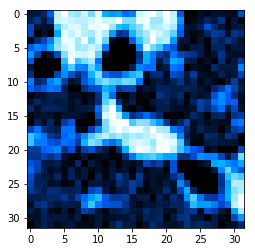

In [25]:
from matplotlib import pyplot as plt

x = x.transpose(1,2,0)
plt.imshow(x)
plt.show()